In [4]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl
import scipy.stats as si
import matplotlib.pyplot as plt

In [5]:
initial_data = yf.download("LINK-USD", start="2021-12-01", end="2022-12-01")

[*********************100%***********************]  1 of 1 completed


In [6]:
import numpy as np
normal_return = []
for i in range(0,len(initial_data)-1):
    adjclose_yesterday = initial_data.iloc[i]['Adj Close']
    adjclose_today = initial_data.iloc[i+1]['Adj Close']
    x = (adjclose_today - adjclose_yesterday) / adjclose_yesterday
    normal_return.append(x)
normal_return[:5]

[-0.03230437709404356,
 -0.050762625593649004,
 -0.11265033819029784,
 -0.057597369913662454,
 0.020893333800769822]

In [7]:
initial_data.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-01,25.291471,26.920416,25.024315,25.356211,25.356211,918605444
2021-12-02,25.365177,25.365177,24.264011,24.537094,24.537094,754628307
2021-12-03,24.566986,25.880491,22.693796,23.291527,23.291527,1012128906
2021-12-04,23.382212,23.382212,15.549089,20.667728,20.667728,2372072138
2021-12-05,20.666725,20.948782,18.529469,19.477322,19.477322,1199283300


In [8]:
initial_data['Adj Close'].head()


Date
2021-12-01    25.356211
2021-12-02    24.537094
2021-12-03    23.291527
2021-12-04    20.667728
2021-12-05    19.477322
Name: Adj Close, dtype: float64

In [9]:
data =  initial_data['Adj Close']
data.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 365 entries, 2021-12-01 to 2022-11-30
Series name: Adj Close
Non-Null Count  Dtype  
--------------  -----  
365 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


In [10]:
data.head()

Date
2021-12-01    25.356211
2021-12-02    24.537094
2021-12-03    23.291527
2021-12-04    20.667728
2021-12-05    19.477322
Name: Adj Close, dtype: float64

In [11]:
data.tail()

Date
2022-11-26    7.146820
2022-11-27    6.902108
2022-11-28    7.207574
2022-11-29    7.320946
2022-11-30    7.680302
Name: Adj Close, dtype: float64

array([<AxesSubplot:xlabel='Date'>], dtype=object)

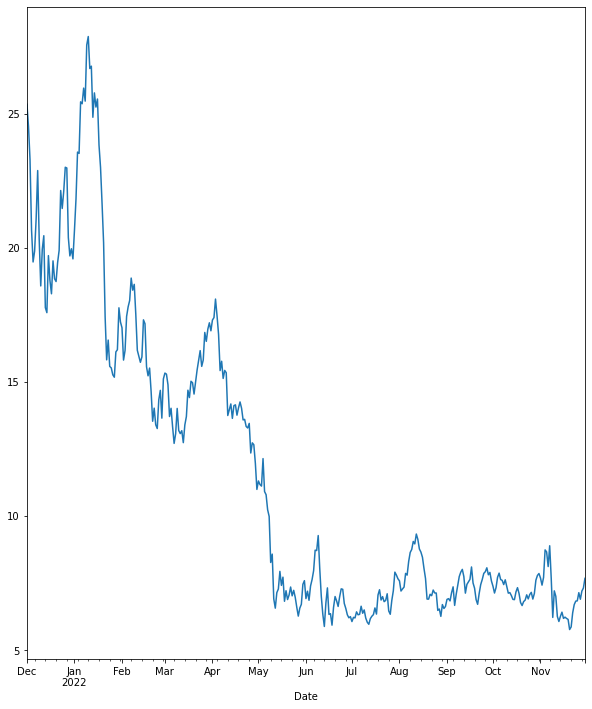

In [12]:
data.plot(figsize=(10, 12), subplots=True)

In [13]:
data.describe().round(2)

count    365.00
mean      11.53
std        5.67
min        5.77
25%        7.03
50%        8.02
75%       15.53
max       27.88
Name: Adj Close, dtype: float64

In [14]:
data.diff().head()

Date
2021-12-01         NaN
2021-12-02   -0.819117
2021-12-03   -1.245567
2021-12-04   -2.623798
2021-12-05   -1.190407
Name: Adj Close, dtype: float64

In [15]:
data.diff().describe().round(2)

count    364.00
mean      -0.05
std        0.70
min       -2.77
25%       -0.33
50%        0.00
75%        0.31
max        2.23
Name: Adj Close, dtype: float64

In [16]:
data.pct_change().round(4).head()

Date
2021-12-01       NaN
2021-12-02   -0.0323
2021-12-03   -0.0508
2021-12-04   -0.1127
2021-12-05   -0.0576
Name: Adj Close, dtype: float64

In [17]:
rets = np.log(data / data.shift(1))
rets.head().round(4)

Date
2021-12-01       NaN
2021-12-02   -0.0328
2021-12-03   -0.0521
2021-12-04   -0.1195
2021-12-05   -0.0593
Name: Adj Close, dtype: float64

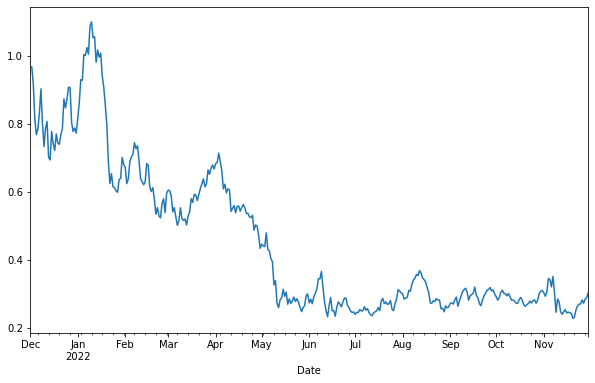

In [18]:
rets.cumsum().apply(np.exp).plot(figsize=(10, 6));


In [19]:
import numpy as np
normal_return = []
for i in range(0,len(initial_data)-1):
    adjclose_yesterday = initial_data.iloc[i]['Adj Close']
    adjclose_today = initial_data.iloc[i+1]['Adj Close']
    x = (adjclose_today - adjclose_yesterday) / adjclose_yesterday
    normal_return.append(x)
normal_return[:5]

[-0.03230437709404356,
 -0.050762625593649004,
 -0.11265033819029784,
 -0.057597369913662454,
 0.020893333800769822]

In [20]:
log_return = []
for i in range(0,len(initial_data)-1):
    adjclose_yesterday = initial_data.iloc[i]['Adj Close']
    adjclose_today = initial_data.iloc[i+1]['Adj Close']
    y = np.log(adjclose_today / adjclose_yesterday)
    log_return.append(y)
log_return[:5]

[-0.032837680298653256,
 -0.052096380557729895,
 -0.11951616712554157,
 -0.05932267525006581,
 0.02067806144359712]

In [21]:
logreturn=np.log(initial_data['Adj Close']/initial_data['Adj Close'].shift(1))
vol=np.sqrt(365)*logreturn.std()
print('The annualized volatility is',round(vol*100,2),'%')


The annualized volatility is 105.32 %


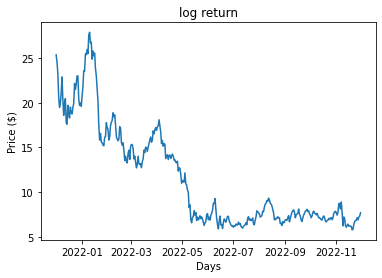

In [22]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(initial_data['Close'])
plt.xlabel('Days')
plt.ylabel('Price ($)')
plt.title('log return');

In [23]:
dflr = pd.DataFrame(log_return, columns = ['log']) 
lr = dflr.mean() * len(dflr)
lv = dflr.std() * (len(dflr) ** 0.5)
print('The annuallized log return is %.8f and its annualized volatility is %.8f' % (lr,lv))



The annuallized log return is -1.19436481 and its annualized volatility is 1.05180328


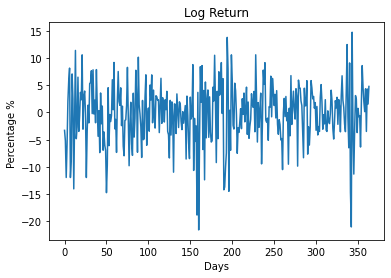

In [24]:
fig = plt.figure()
plt.plot(dflr * 100)
plt.xlabel('Days')
plt.ylabel('Percentage % ')
plt.title('Log Return');


In [25]:
initial_data['SMA1'] = data.rolling(window=20).mean()
initial_data['SMA2'] = data.rolling(window=60).mean()
initial_data[[ 'SMA1', 'SMA2']].tail()


,SMA1,SMA2
Date,,
2022-11-26,6.618122,7.142301
2022-11-27,6.518428,7.127100
2022-11-28,6.494655,7.115540
2022-11-29,6.549477,7.111203
2022-11-30,6.572759,7.116084


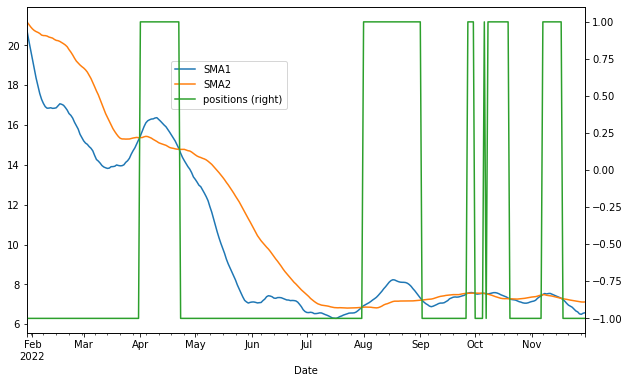

In [26]:
initial_data.dropna(inplace=True)
initial_data['positions'] = np.where(initial_data['SMA1'] > initial_data['SMA2'],1,-1)
ax = initial_data[[ 'SMA1', 'SMA2', 'positions']].plot(figsize=(10, 6),secondary_y='positions')
ax.get_legend().set_bbox_to_anchor((0.25, 0.85))

In [27]:
import os
import matplotlib.pyplot as plt

In [28]:
initial_data['Adj Close'][-1]

7.680302143096924

# Monte Carlo

In [29]:
def mcs_simulation_np(p,s):
    M = p  # M is number of time steps
    I = s  # I is number of simulation
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - vol ** 2 / 2) * dt + vol * np.sqrt(dt) * rn[t]) 
    return S

In [30]:
S0 = 7.68              # spot stock price
K = 8             # strike
T = 3/12         # maturity 
r = 0.04                    # risk free rate 
vol = 1.0532             # diffusion coefficient or volatility
N = 3                       # number of periods or number of time steps  
payoff = "call"                # payoff 


In [31]:
S = mcs_simulation_np(100,10000)

In [32]:
S = np.transpose(S)
S

array([[ 7.68      ,  7.5974573 ,  7.33488116, ..., 11.90339521,
        11.72330117, 12.11139761],
       [ 7.68      ,  7.56447354,  7.08971638, ..., 10.07102658,
        10.09184247, 10.22560944],
       [ 7.68      ,  7.68037918,  7.66598776, ..., 12.40646492,
        11.57614625, 10.46085158],
       ...,
       [ 7.68      ,  7.80796084,  9.01668803, ...,  5.19753006,
         5.44443885,  5.00598475],
       [ 7.68      ,  7.77497172,  7.67843465, ...,  7.65861787,
         8.58073663,  8.79176662],
       [ 7.68      ,  8.59597873,  8.83645114, ..., 13.0164293 ,
        11.9752916 , 12.60805602]])

Text(0, 0.5, 'Frequency')

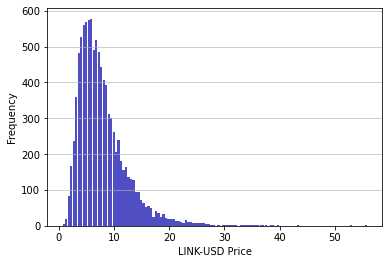

In [33]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)
#n, bins, patches = plt.hist(x=S[:,1], bins=[30,40,50,60,70,80,90,100,110,120],range =(S.min(),S.max()), color='#0504aa',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('LINK-USD Price')
plt.ylabel('Frequency')

In [34]:
p = np.mean(np.maximum(K - S[:,-1],0))
print('European put from Monte Carlo Simulation', str(p))

European put from Monte Carlo Simulation 1.7125649224929391


# BSM

In [35]:
def euro_option_bs(S, K, T, r, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value = - S * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [36]:
bsp = euro_option_bs(7.68,8,3/12,0.04,1.0532, "call")
print('European put option price using BSM is $', bsp)

European put option price using BSM is $ 1.502461282282174


In [37]:
S = np.linspace(5,15,14)
cp = np.zeros((len(S),1))
for i in range(len(S)):
    cp[i] = euro_option_bs(S[i],8,3/12,0.04,1.01532, "call")

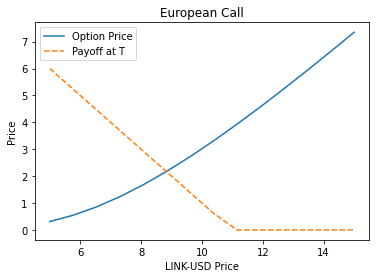

In [38]:
fig = plt.figure()
plt.plot(S, cp, '-')
plt.plot(S, np.maximum(11- S,0), '--')
plt.xlabel('LINK-USD Price')
plt.ylabel('Price')
plt.title('European Call')
plt.legend(['Option Price','Payoff at T'])


# Delta

In [39]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0)
    
    return delta


In [40]:
delta(7.68,8, 3/12,0.04,0, 1.0532,'call')

0.5811240149635234

In [41]:
S = np.linspace(5,15,11)
Delta_Call = np.zeros((len(S),1))
Delta_Put = np.zeros((len(S),1))
for i in range(len(S)):
    Delta_Call [i] = delta(S[i], 8, 3/12,0.04,0, 1.0532,'call')
    

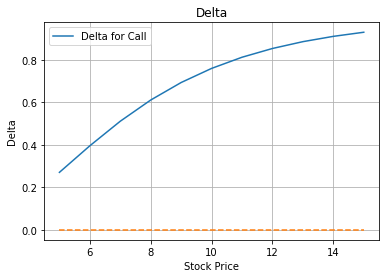

In [42]:
fig = plt.figure()
plt.plot(S, Delta_Call, '-')
plt.plot(S, Delta_Put, '--')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for Call'])

In [43]:
S = np.linspace(5,15,11)
T = np.linspace(3/365,7/365,11)
Delta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Delta[i,j] = delta(S[j], 8, 3/12 , 0.04, 0, 1.0532, 'call')

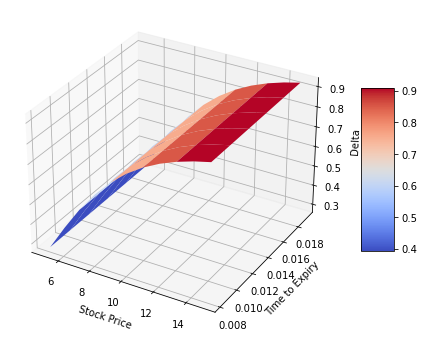

In [44]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Delta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);

# Gamma

In [45]:
def gamma(S, K, T, r, q, vol):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma


In [46]:
g = gamma(7.68,8,3/12,0.04,0,1.0532)
print('The value of Gamma is', g.round(4),'.','If the stock price increase (or decrease) $1, then the value of the delta will increase (or decrease) by', abs(g).round(4))


The value of Gamma is 0.0966 . If the stock price increase (or decrease) $1, then the value of the delta will increase (or decrease) by 0.0966


In [47]:
S = np.linspace(5,15,11)
Gamma = np.zeros((len(S),1))
for i in range(len(S)):
    Gamma [i] = gamma(S[i],8,3/12,0.04,0,1.0532)

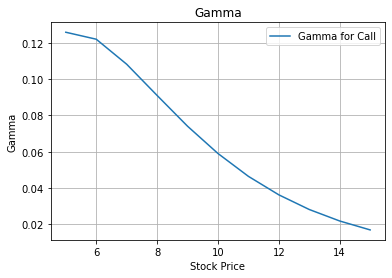

In [48]:
fig = plt.figure()
plt.plot(S, Gamma, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Call'])

In [49]:
S = np.linspace(9, 13, 30)
T = np.linspace(0.001, 0.005, 10)
Gamma = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Gamma[i,j] = gamma(S[j], 8,T[i], 0.04,0, 1.0532)

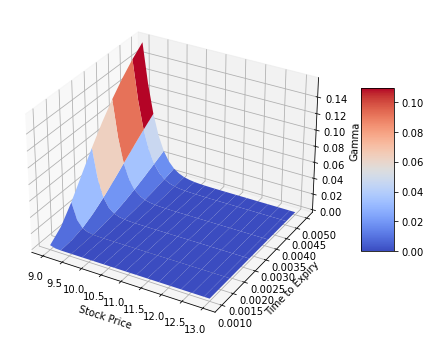

In [50]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection='3d')
S,T  = np.meshgrid(S,T)
surf = ax.plot_surface(S,T, Gamma, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Gamma')
fig.colorbar(surf, shrink=0.5, aspect=5);


# Speed

In [57]:
def speed(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = - np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * np.sqrt(T)) * (d1 + vol * np.sqrt(T))
    
    return speed


In [58]:
speed(7.68, 8, 3/12,0.04,0, 1.0532,'call')


-0.008734294330369948

In [59]:
S = np.linspace(5,15,11)
Speed = np.zeros((len(S),1))
for i in range(len(S)):
    Speed [i] = speed(S[i], 8, 3/12,0.04,0, 1.0532,'call')


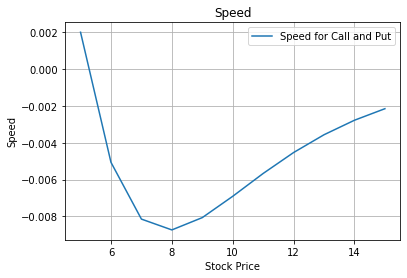

In [60]:
fig = plt.figure()
plt.plot(S, Speed, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Speed')
plt.title('Speed')
plt.legend(['Speed for Call and Put'])

In [61]:
S = np.linspace(5,15,11)
T = np.linspace(30/365,61/365,51)
Speed = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Speed[i,j] = speed(S[j], 8, 3/12 , 0.04, 0,1.0532, 'call')


/var/folders/48/hmr18p1s2lbccjxcz8k87_wh0000gn/T/ipykernel_90274/1603304871.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


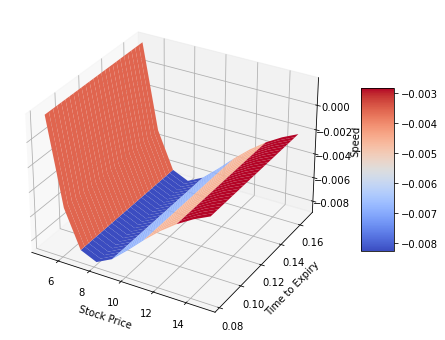

In [62]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Speed, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Speed')
fig.colorbar(surf, shrink=0.5, aspect=5);

# Theta

In [63]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = vol * S * np.exp(- q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) + q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) - r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [64]:
S = np.linspace(5,15,11)
T = np.linspace(0.5, 2, 51)
Theta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Theta[i,j] = theta(S[j], 8,3/12 , 0.04, 0, 1.0532, 'call')


/var/folders/48/hmr18p1s2lbccjxcz8k87_wh0000gn/T/ipykernel_90274/2188240016.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


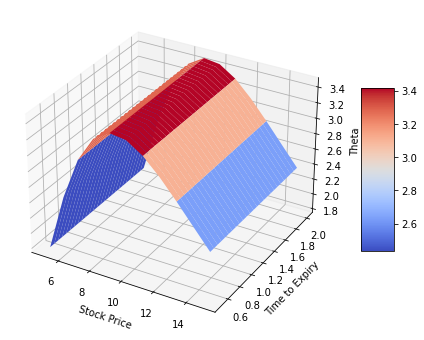

In [65]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Theta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Theta')
fig.colorbar(surf, shrink=0.5, aspect=5);


# Vega

In [66]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega


In [67]:
S = np.linspace(5,15,11)
T = np.linspace(0.5, 2, 51)
Vega = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Vega[i,j] = vega(S[j], 8, T[i], 0.04, 0, 1.0532, 'call')


/var/folders/48/hmr18p1s2lbccjxcz8k87_wh0000gn/T/ipykernel_90274/2704700163.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


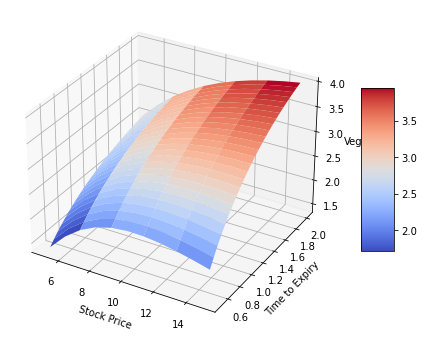

In [68]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Vega, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Vega')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [70]:
v = vega(7.68, 8, 7/365, 0.04, 0,1.0532, 'call')
print('The value of Vega is', v.round(4),'.','If the volatility increases by 1%, then the value of the option will increase by $', v.round(4)*0.01, '.')


The value of Vega is 0.4158 . If the volatility increases by 1%, then the value of the option will increase by $ 0.004158 .


# END